In [2]:
%matplotlib inline
import matplotlib
from matplotlib import pylab
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.dpi'] = 80
textsize = 'x-large'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 4),
         'axes.labelsize': textsize,
         'axes.titlesize': textsize,
         'xtick.labelsize': textsize,
         'ytick.labelsize': textsize,
         'figure.facecolor': 'w'}
pylab.rcParams.update(params)
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import gridspec
from matplotlib import patches as mpatches

import glob
import numpy as np
import os
import scipy

%load_ext autoreload
%autoreload 2
import sys

sys.path.insert(1, '../code')
import plotter
import utils
from utils import *

#sys.path.insert(1, '../../clust')
#import clustering_statistics as cs

In [3]:
plot_dir = '../plots/plots_2022-09-27'

In [9]:
statistics = ['wp', 'xi', 'xi2', 'upf', 'mcf']
stat_strs_single = np.loadtxt('../tables/statistic_sets_single.txt', dtype=str)
stat_strs_addin = np.loadtxt('../tables/statistic_sets_addin.txt', dtype=str)
stat_strs_addin_full = np.concatenate((['wp'], stat_strs_addin))
stat_strs_scale = np.concatenate((stat_strs_single, 
                                 ['xi_xi2', 'wp_xi_xi2', 'wp_xi_xi2_mcf', 'wp_xi_xi2_upf_mcf']))

params_keydeliverable = ['Omega_m', 'sigma_8', 'f', 'fsigma8']
params_keycosmo = ['Omega_m', 'sigma_8', 'f']
params_keyhodab = ['M_sat', 'v_bs', 'f_env']
params_keymix = ['Omega_m', 'sigma_8', 'f', 'M_sat', 'v_bs', 'f_env']

id_pairs = np.loadtxt('../tables/id_pairs_recovery_test_70.txt', delimiter=',', dtype=np.int)

In [6]:
labels_single = [
                 make_label('wp'),
                 make_label('xi'),
                 make_label('xi2'),
                 make_label('upf'),
                 make_label('mcf')
                ]
labels_addin = [
                 make_label('wp'),
                 '+'+make_label('xi'),
                 '+'+make_label('xi2'),
                 '+'+make_label('upf'),
                 '+'+make_label('mcf'),
                ]
labels_addin_full = [
                 make_label('wp'),
                 make_label(['wp', 'xi']),
                 make_label(['wp', 'xi', 'xi2']),
                 make_label(['wp', 'xi', 'xi2', 'upf']),
                 make_label(['wp', 'xi', 'xi2', 'upf', 'mcf'])
                ]
labels_scale = np.concatenate((labels_single, 
                               [make_label(['xi', 'xi2']),
                                make_label(['wp', 'xi', 'xi2']),
                                make_label(['wp', 'xi', 'xi2', 'mcf']),
                                make_label(['wp', 'xi', 'xi2', 'upf', 'mcf'])]))


In [10]:
colors_single = ['#73B9F3', '#2B66CE', '#31D8BF', '#FFB142', '#F97FF0']
colors_addin = ['#73B9F3', '#8973F5', '#952DAD', '#D81471', '#B70D0D']
colors_scale = np.concatenate((colors_single, 
                               ['navy', colors_addin[2], '#ff33b4', colors_addin[-1]]))
colors_cov = ['#7B767B', colors_addin[-1]]

## Chain plots

In [119]:
# easiest to load emu from chaintag
stat_str = 'wp_xi_xi2_upf_mcf'
#chaintag = f'{stat_str}_c1h12_all'
chaintag = f'{stat_str}_c6h62_all_minscale0'
emu_dict = utils.load_emus(chaintag)

[array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([0, 1, 2, 3, 4, 5, 6, 7, 8])]
_aemulus_train
original number of training ID pairs: 4000
N train: 4000
N train: 4000
Bad ID: [737.6403   437.3505   261.5853   159.2337    95.36069   57.9631
  31.37335   14.75509    5.173866]


/home/users/ksf293/miniconda3/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/users/ksf293/miniconda3/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator FunctionTransformer from version 0.24.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


_aemulus_train
original number of training ID pairs: 4000
N train: 4000
N train: 4000
Bad ID: [9.952341e+01 5.369045e+01 2.760189e+01 1.546452e+01 8.588675e+00
 4.148388e+00 1.412300e+00 3.680433e-01 7.212426e-02]


/home/users/ksf293/miniconda3/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/users/ksf293/miniconda3/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator FunctionTransformer from version 0.24.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


_aemulus_train
original number of training ID pairs: 4000
N train: 4000
N train: 4000
Bad ID: [ 7.160133e+01  5.220598e+01  2.874251e+01  1.350905e+01  6.002517e+00
  1.814053e+00 -3.555206e-02 -1.916190e-01 -7.313132e-02]


/home/users/ksf293/miniconda3/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/users/ksf293/miniconda3/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator FunctionTransformer from version 0.24.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


_aemulus_train
original number of training ID pairs: 4000
N train: 4000
N train: 4000
Bad ID: [0.919184 0.605841 0.259823 0.160021 0.064337 0.028621 0.011524 0.002987
 0.000946]


/home/users/ksf293/miniconda3/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/users/ksf293/miniconda3/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator FunctionTransformer from version 0.24.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


_aemulus_train
original number of training ID pairs: 4000
N train: 4000
N train: 4000
Bad ID: [0.7438077 0.7222529 0.7066134 0.709113  0.7048816 0.6832968 0.7578443
 0.9231438 0.9806807]


/home/users/ksf293/miniconda3/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/users/ksf293/miniconda3/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator FunctionTransformer from version 0.24.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [71]:
chain_fn = f'../chains/param_files/chain_params_{chaintag}.h5'
f = h5py.File(chain_fn, 'r')
params_true = f.attrs['true_values']
param_names = f.attrs['param_names_vary']
pdict_fiducial = dict(zip(param_names, params_true))
pdict_fiducial

{'Omega_m': 0.321332,
 'Omega_b': 0.0511167,
 'sigma_8': 0.798135,
 'h': 0.667317,
 'n_s': 0.973626,
 'N_eff': 3.2,
 'w': -0.90392,
 'M_sat': 14.11591358005853,
 'alpha': 1.297202,
 'M_cut': 12.116361640470622,
 'sigma_logM': 0.2602439,
 'v_bc': 0.3750205,
 'v_bs': 1.281455,
 'c_vir': 1.195859,
 'f': 1.283247,
 'f_env': 0.02831959,
 'delta_env': 1.321553,
 'sigma_env': 0.6858013}

In [29]:
from matplotlib.collections import LineCollection

def multiline(xs, ys, c, ax=None, **kwargs):
    """Plot lines with different colorings

    Parameters
    ----------
    xs : iterable container of x coordinates
    ys : iterable container of y coordinates
    c : iterable container of numbers mapped to colormap
    ax (optional): Axes to plot on.
    kwargs (optional): passed to LineCollection

    Notes:
        len(xs) == len(ys) == len(c) is the number of line segments
        len(xs[i]) == len(ys[i]) is the number of points for each line (indexed by i)

    Returns
    -------
    lc : LineCollection instance.
    """

    # find axes
    ax = plt.gca() if ax is None else ax

    # create LineCollection
    segments = [np.column_stack([x, y]) for x, y in zip(xs, ys)]
    lc = LineCollection(segments, **kwargs)

    # set coloring of line segments
    #    Note: I get an error if I pass c as a list here... not sure why.
    lc.set_array(np.asarray(c))

    # add lines to axes and rescale 
    #    Note: adding a collection doesn't autoscalee xlim/ylim
    ax.add_collection(lc)
    ax.autoscale()
    return lc

In [87]:
cmap = utils.shiftedColorMap(matplotlib.cm.gist_earth, start=0, midpoint=0.45, stop=0.9, name='gist_earth_shifted')

In [114]:
def plot_stat_dep(statistic, emu, param_name, pdict_fiducial, cmap='gist_earth', mock_name_hod='aemulus_test'):
    
    rs = r_dict[statistic]
    stat_fiducial = emu.predict(pdict_fiducial)
    
    fig, axarr = plt.subplots(2, 1, figsize=(6,6), gridspec_kw={'height_ratios': [2, 1]})
    plt.subplots_adjust(hspace=0, wspace=0.4)
    
    cosmo_bounds = utils.get_cosmo_bounds(mock_name_hod)
    hod_bounds = utils.get_hod_bounds(mock_name_hod)
    bounds = {}
    bounds.update(cosmo_bounds)
    bounds.update(hod_bounds)
    
    pmin, pmax = bounds[param_name]

    n_vals = 10
    vals = np.linspace(pmin, pmax, n_vals)
    pdict = pdict_fiducial.copy()
    
    preds = []
    for val in vals:
        pdict[param_name] = val
        preds.append( emu.predict(pdict) )
        
    axtop = axarr[0]
    axbot = axarr[1]

    lc = multiline([rs]*n_vals, preds, vals, cmap=cmap, ax=axtop)
    ratio = preds/stat_fiducial
    lc = multiline([rs]*n_vals, ratio, vals, cmap=cmap, ax=axbot)

    # fiducial
    axtop.plot(rs, stat_fiducial, color='silver', ls='--', label='fiducial cosmology', zorder=1000)
    axbot.axhline(1.0, color='silver',  ls='--')
    
    axcb = fig.colorbar(lc, ax=[axtop,axbot], format='%.2f')
    axcb.set_label(rf'${param_labels[param_name]}$', rotation=0, labelpad=20, fontsize=20)

    axtop.set_xscale(scale_dict[statistic][0])
    axbot.set_xscale(scale_dict[statistic][0])
    axtop.set_yscale(scale_dict[statistic][1])
    
    axbot.set_xlabel(r_labels[statistic])
    axtop.set_xticks([])

    axtop.set_xlim(min(rs), max(rs))
    axbot.set_xlim(min(rs), max(rs))

    axtop.set_ylabel(stat_labels[statistic])
    axbot.set_ylabel(rf'{stat_labels[statistic]}/[{stat_labels[statistic]}, fiducial]')

    axtop.legend() 

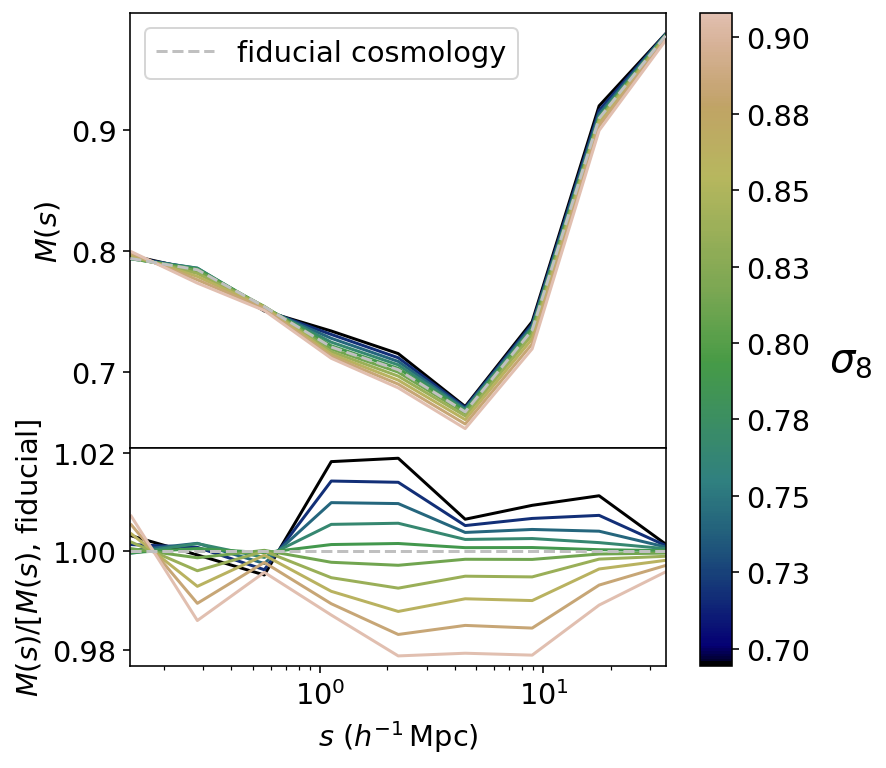

In [117]:
%matplotlib inline
plot_stat_dep('mcf', emu_dict['mcf'], 'sigma_8', pdict_fiducial, cmap='gist_earth_shifted')
plt.savefig(f'{plot_dir}/mcf_dep.pdf', bbox_inches='tight')

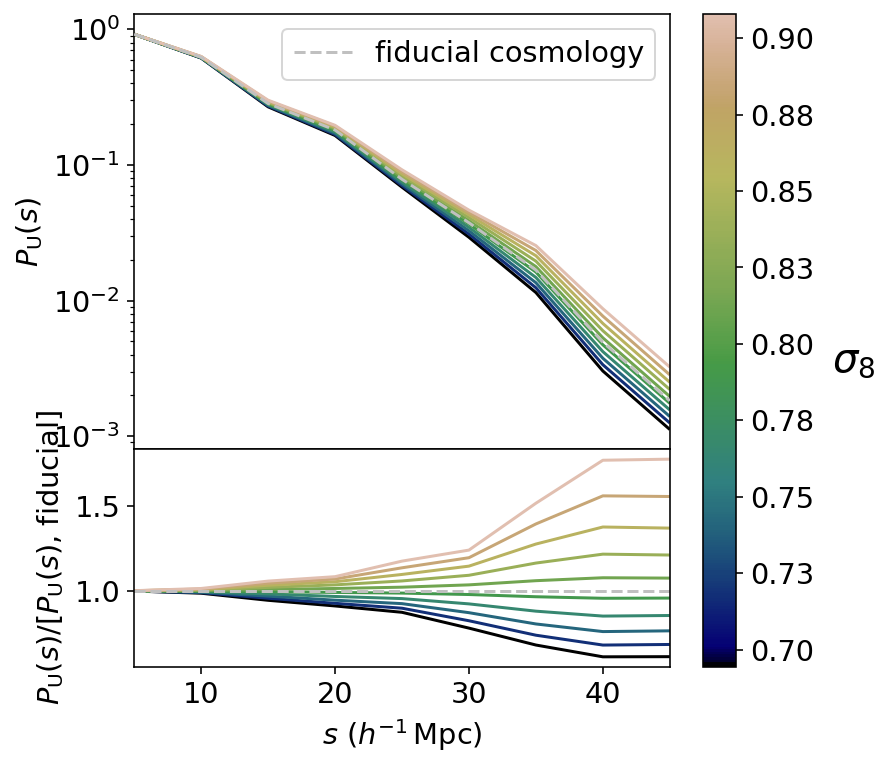

In [120]:
%matplotlib inline
plot_stat_dep('upf', emu_dict['upf'], 'sigma_8', pdict_fiducial, cmap='gist_earth_shifted')
plt.savefig(f'{plot_dir}/upf_dep.pdf', bbox_inches='tight')

# Scale dependence

In [121]:
statistics = ['wp', 'xi', 'xi2', 'upf', 'mcf']
stat_strs_single = np.loadtxt('../tables/statistic_sets_single.txt', dtype=str)
stat_strs_addin = np.loadtxt('../tables/statistic_sets_addin.txt', dtype=str)
stat_strs_addin_full = np.concatenate((['wp'], stat_strs_addin))
stat_strs_scale = np.concatenate((stat_strs_single, 
                                 ['xi_xi2', 'wp_xi_xi2', 'wp_xi_xi2_mcf', 'wp_xi_xi2_upf_mcf']))

params_keydeliverable = ['Omega_m', 'sigma_8', 'f', 'fsigma8']
params_keycosmo = ['Omega_m', 'sigma_8', 'f']
params_keyhodab = ['M_sat', 'v_bs', 'f_env']
params_keymix = ['Omega_m', 'sigma_8', 'f', 'M_sat', 'v_bs', 'f_env']

id_pairs = np.loadtxt('../tables/id_pairs_recovery_test_70.txt', delimiter=',', dtype=np.int)

In [123]:
colors_single = ['#73B9F3', '#2B66CE', '#31D8BF', '#FFB142', '#F97FF0']
colors_addin = ['#73B9F3', '#8973F5', '#952DAD', '#D81471', '#B70D0D']
colors_scale = np.concatenate((colors_single, 
                               ['navy', colors_addin[2], '#ff33b4', colors_addin[-1]]))
colors_cov = ['#7B767B', colors_addin[-1]]

In [127]:
results_dict_dir = '../data_products/results_dicts'

In [128]:
fn_results_dict_minscales = f'{results_dict_dir}/results_dict_minscales_upfmatch.npy'
results_dict_minscales = np.load(fn_results_dict_minscales, allow_pickle=True).item()

In [129]:
fn_results_dict_maxscales = f'{results_dict_dir}/results_dict_maxscales_upfmatch.npy'
results_dict_maxscales = np.load(fn_results_dict_maxscales, allow_pickle=True).item()

In [130]:
chaintag_prior = 'prior'
prior_dict = utils.construct_results_dict(chaintag_prior)

0.0249559109086972
0.03697862672100119
0.20668165663157434
0.3300031358054101
0.16888511714833038

0.40933691242695325
0.08782484034396176
0.3300031358054101

0.16953702466001833


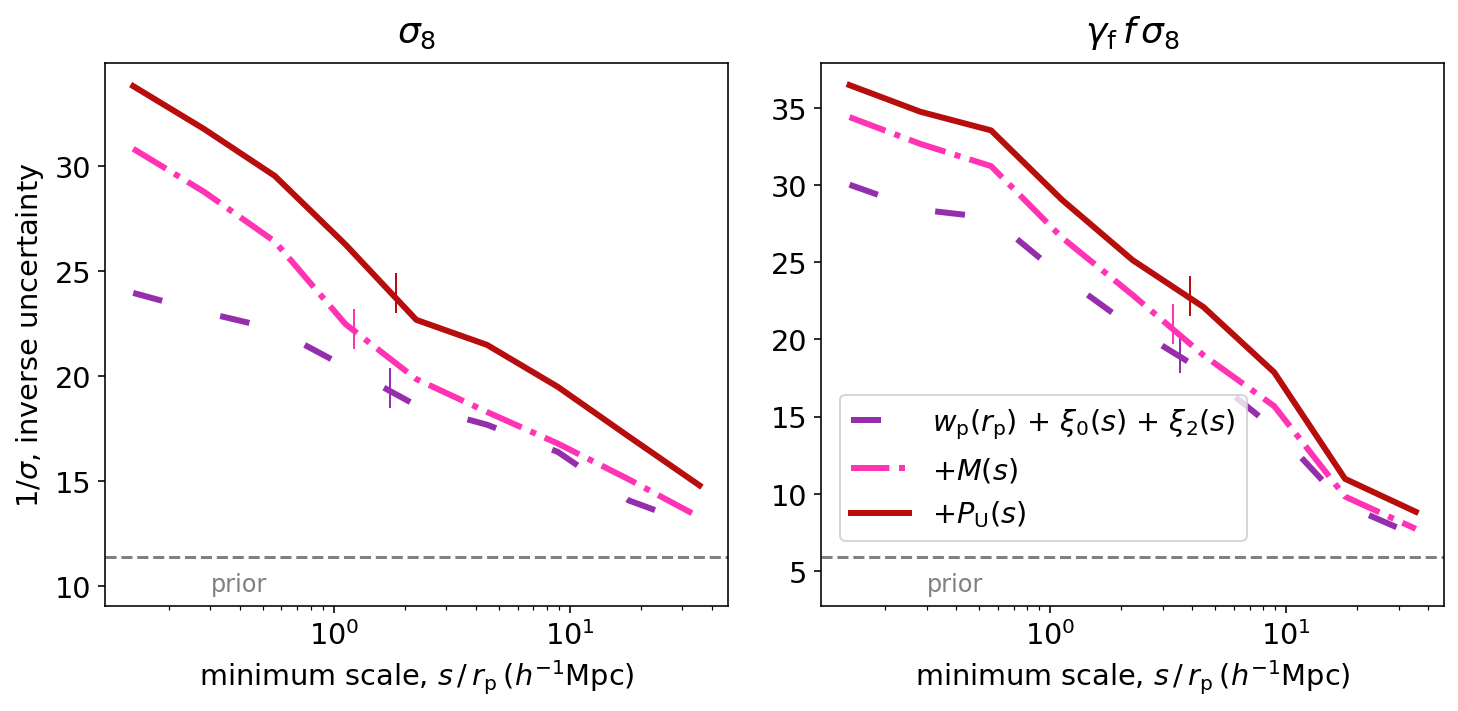

In [131]:
%matplotlib inline
lws = np.array([3,3,3])
long_dash = (0, (5, 10))
lss = np.array([long_dash, '-.', '-'])
min_scales = np.arange(0,9)

stat_strs = ['wp_xi_xi2', 'wp_xi_xi2_mcf', 'wp_xi_xi2_upf_mcf']

labels = [make_label(stat_strs[0]), '+'+make_label('mcf'), '+'+make_label('upf')]
colors = colors_addin[2:5]
colors[1] = '#ff33b4'

ylabel = r"1/$\sigma$, inverse uncertainty"
plotter.plot_scale_dependence_figure(min_scales, results_dict_minscales, prior_dict, 
                             ['sigma_8', 'fsigma8'], stat_strs, id_pairs, labels, colors,
                             nrows=1, ncols=2, lss=lss, lws=lws, 
                             xlabel=r'minimum scale, $s \, / \, r_\mathrm{p} \: (h^{-1}\mathrm{Mpc})$',
                             ylabel=ylabel,
                             comparison_dicts=results_dict_maxscales, show_top_axis=False)
plt.savefig(f'{plot_dir}/scale_dependence_addin.pdf', bbox_inches='tight')

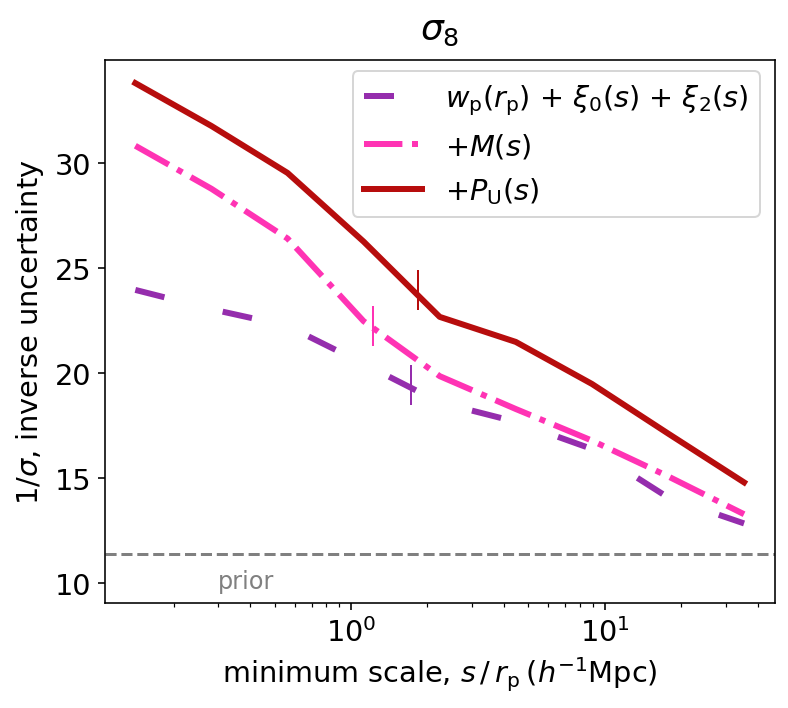

In [137]:
%matplotlib inline
lws = np.array([3,3,3])
long_dash = (0, (5, 10))
lss = np.array([long_dash, '-.', '-'])
min_scales = np.arange(0,9)

stat_strs = ['wp_xi_xi2', 'wp_xi_xi2_mcf', 'wp_xi_xi2_upf_mcf']

labels = [make_label(stat_strs[0]), '+'+make_label('mcf'), '+'+make_label('upf')]
colors = colors_addin[2:5]
colors[1] = '#ff33b4'

ylabel = r"1/$\sigma$, inverse uncertainty"
plotter.plot_scale_dependence_figure(min_scales, results_dict_minscales, prior_dict, 
                             ['sigma_8'], stat_strs, id_pairs, labels, colors,
                             nrows=1, ncols=1, lss=lss, lws=lws, 
                             xlabel=r'minimum scale, $s \, / \, r_\mathrm{p} \: (h^{-1}\mathrm{Mpc})$',
                             ylabel=ylabel,
                             comparison_dicts=results_dict_maxscales, show_top_axis=False)
plt.savefig(f'{plot_dir}/scale_dependence_addin_sigma8.pdf', bbox_inches='tight')

## Uchuu recovery

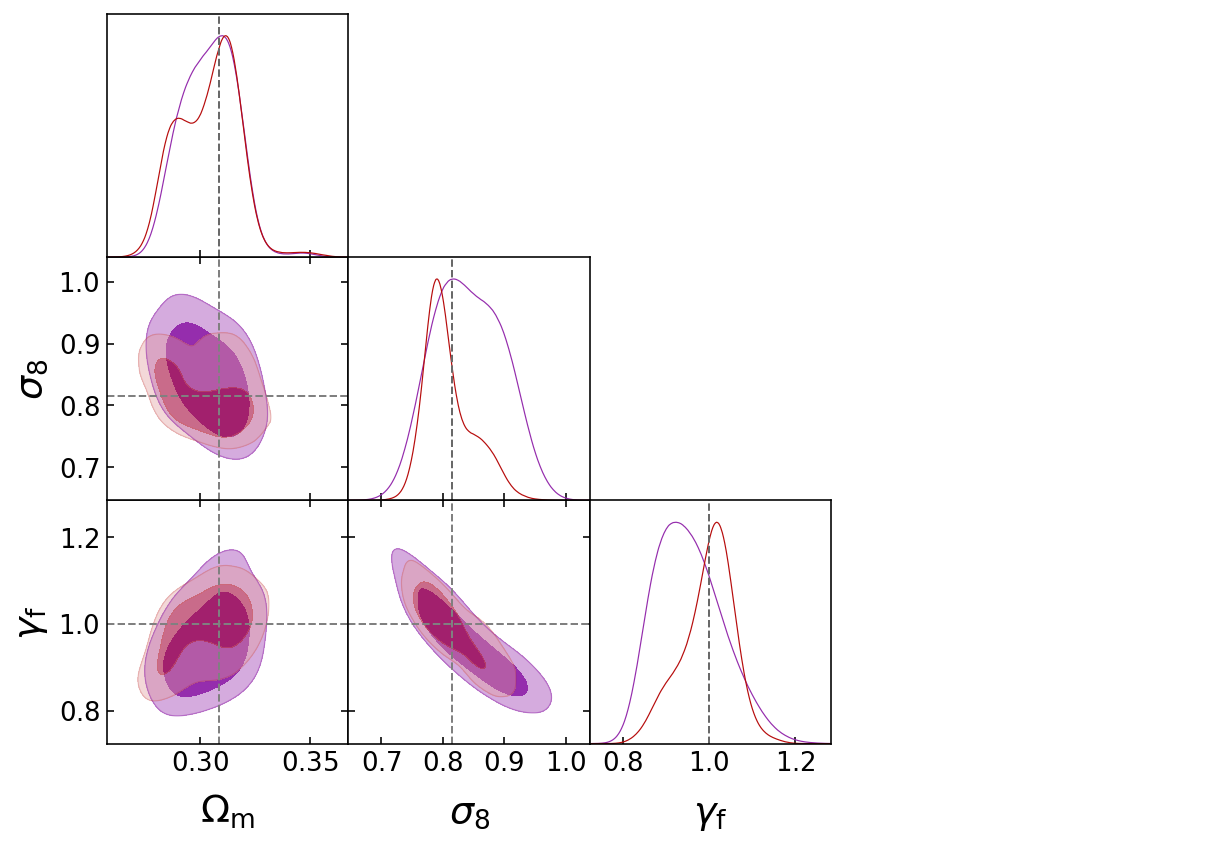

In [15]:
%matplotlib inline
chaintags = [
             'wp_xi_xi2_uchuu_all_Msatmocks_covglamsmooth_boundsingle_uchuuchi2nclosest2000',
             'wp_xi_xi2_upf_mcf_uchuu_all_Msatmocks_covglamsmooth_boundsingle_uchuuchi2nclosest2000_inflateupferr2diag'
            ]
colors = [colors_addin[2], colors_addin[4]]
labels = [labels_addin_full[2], labels_addin_full[4]]
g = plotter.plot_contours(chaintags, colors=colors,
                          legend_labels=None, legend_loc=(1.1, 0.5),
                          legend_fontsize=18,
                          params_toplot=params_keycosmo)
plt.savefig(f'{plot_dir}/uchuu_recovery.pdf', bbox_inches='tight')